# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [3]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [5]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [6]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [7]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

In [8]:
# Mostrar resultado de LabelEncoder en 'sex'
print('=== LabelEncoder en sex ===')
print(data[['sex', 'sex_label']].drop_duplicates().sort_values('sex_label'))

print('\n=== OneHotEncoder en embarked (pd.get_dummies) ===')
print(data[['embarked', 'embarked_C', 'embarked_Q', 'embarked_S']].drop_duplicates().dropna().sort_values('embarked'))

=== LabelEncoder en sex ===
      sex  sex_label
1  female          0
0    male          1

=== OneHotEncoder en embarked (pd.get_dummies) ===
  embarked  embarked_C  embarked_Q  embarked_S
1        C        True       False       False
5        Q       False        True       False
0        S       False       False        True


Diferencias clave:

LabelEncoder:
  - Asigna un número entero a cada categoría (ej. female=0, male=1).
  - Produce una sola columna numérica.
  - Introduce un orden implícito entre categorías (0 < 1) que puede
    confundir a ciertos algoritmos haciéndoles creer que female < male.
  - Apropiado para variables ordinales o para árboles de decisión.

OneHotEncoder (pd.get_dummies):
  - Crea una columna binaria (0/1) por cada categoría.
  - No introduce orden entre categorías; cada una es independiente.
  - Aumenta la dimensionalidad del dataset.
  - Apropiado para variables nominales y para algoritmos lineales o KNN.

### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

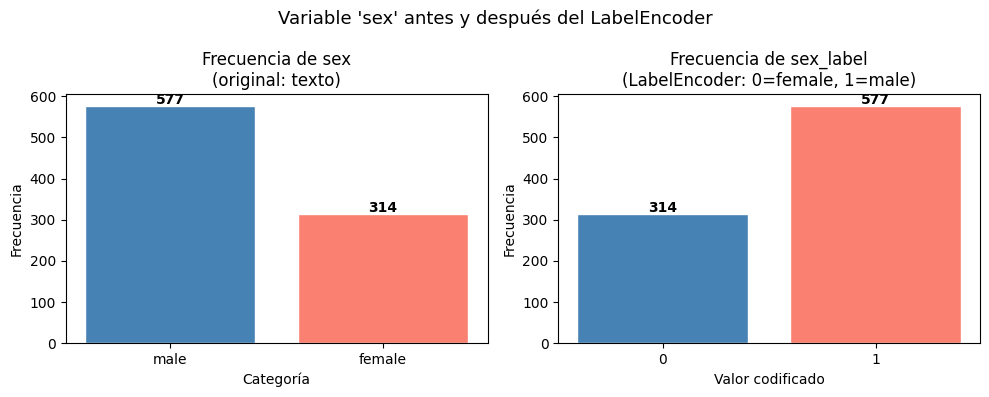

Las frecuencias son idénticas; solo cambia la representación: texto → número entero.


In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Antes: categorías originales
sex_counts = data['sex'].value_counts()
axes[0].bar(sex_counts.index, sex_counts.values, color=['steelblue', 'salmon'], edgecolor='white')
axes[0].set_title('Frecuencia de sex\n(original: texto)')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')
for i, v in enumerate(sex_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Después: valores codificados (0=female, 1=male)
label_counts = data['sex_label'].value_counts().sort_index()
axes[1].bar([str(k) for k in label_counts.index], label_counts.values,
            color=['steelblue', 'salmon'], edgecolor='white')
axes[1].set_title('Frecuencia de sex_label\n(LabelEncoder: 0=female, 1=male)')
axes[1].set_xlabel('Valor codificado')
axes[1].set_ylabel('Frecuencia')
for i, v in enumerate(label_counts.values):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.suptitle("Variable 'sex' antes y después del LabelEncoder", fontsize=13)
plt.tight_layout()
plt.show()
print('Las frecuencias son idénticas; solo cambia la representación: texto → número entero.')

### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

Columnas generadas por OneHotEncoder para class:
    class  class_First  class_Second  class_Third
1   First         True         False        False
9  Second        False          True        False
0   Third        False         False         True


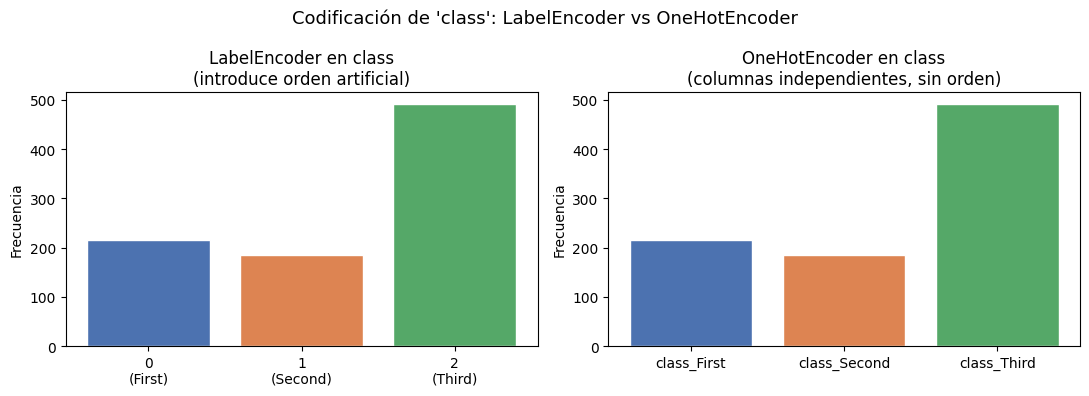

In [10]:
# OneHotEncoder para la columna 'class'
class_dummies = pd.get_dummies(data['class'], prefix='class')
data_with_class = pd.concat([data, class_dummies], axis=1)

print('Columnas generadas por OneHotEncoder para class:')
print(data_with_class[['class', 'class_First', 'class_Second', 'class_Third']].drop_duplicates().sort_values('class'))

# Comparación visual
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# LabelEncoder en class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
class_label = le.fit_transform(data['class'].astype(str))
import numpy as np
unique_labels, counts = np.unique(class_label, return_counts=True)
axes[0].bar([f'{v}\n({le.classes_[v]})' for v in unique_labels], counts,
            color=['#4C72B0','#DD8452','#55A868'], edgecolor='white')
axes[0].set_title('LabelEncoder en class\n(introduce orden artificial)')
axes[0].set_ylabel('Frecuencia')

# OneHotEncoder en class
ohe_sums = class_dummies.sum()
axes[1].bar(ohe_sums.index, ohe_sums.values,
            color=['#4C72B0','#DD8452','#55A868'], edgecolor='white')
axes[1].set_title('OneHotEncoder en class\n(columnas independientes, sin orden)')
axes[1].set_ylabel('Frecuencia')

plt.suptitle("Codificación de 'class': LabelEncoder vs OneHotEncoder", fontsize=13)
plt.tight_layout()
plt.show()

Ventajas de OneHotEncoder para 'class':
  - 'class' es nominal (First, Second, Third no tienen orden matemático real).
  - LabelEncoder asignaría 0, 1, 2, implicando First < Second < Third,
    lo que podría sesgar modelos lineales o de distancia.
  - OneHotEncoder crea 3 columnas binarias independientes, evitando
    cualquier orden implícito y permitiendo al modelo tratar cada clase
    como una categoría distinta sin relación de magnitud.

### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

Pues depende de la variable y del algoritmo:

1. Variables NOMINALES (sin orden) — sex, embarked, class:
   → OneHotEncoder (pd.get_dummies)
   - No introduce órdenes artificiales.
   - Ideal para regresión logística, SVM, KNN y redes neuronales.
   - Se recomienda drop_first=True para evitar multicolinealidad
     (trampa de la variable dummy).

2. Variables ORDINALES (con orden implícito) — pclass (1 > 2 > 3 en jerarquía):
   → LabelEncoder o mapeo manual (ej. {'First':1, 'Second':2, 'Third':3})
   - Preserva la relación de orden que sí existe entre categorías.

3. Para árboles de decisión y modelos de ensamble (Random Forest, XGBoost):
   → LabelEncoder es suficiente, ya que estos modelos no asumen linealidad
     ni se ven afectados por el orden numérico de la misma manera.

Conclusión para Titanic:
   - sex → OneHotEncoder (drop_first=True → queda una sola columna 'sex_male')
   - embarked → OneHotEncoder (3 puertos, 2 columnas con drop_first)
   - class / pclass → LabelEncoder si se usa árbol; OneHotEncoder si se usa modelo lineal.